In [42]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
from matplotlib import pyplot as plt
import glob
import os


In [43]:
def get_csv_df_to_img(csv_df):
    sparse_image = coo_matrix((csv_df.VoxVal, (csv_df.X,csv_df.pY)), shape = (240,240))
    image = sparse_image.todense()
    return image 

In [186]:
def get_image_list(input_csv_path,input_gray_csv_path,slice_num):
    #print(input_csv_path)
    csv_files = []
    for root, directories, files in  os.walk(input_csv_path, topdown=False):
        for file in files:
            csv_files.append(file)
    gray_csv_files = []
    for root, directories, files in  os.walk(input_gray_csv_path, topdown=False):
        for file in files:
            gray_csv_files.append(file)
    img_list = []
    csv_files
    for i,file in enumerate(csv_files):
        df = pd.read_csv(input_csv_path + "/" + file)
        tumor_df = df.query('istumor == 1')
        tumor_df = tumor_df[tumor_df['Z'] == slice_num]
        slice_tumor_df = tumor_df.head(n=1)
        #print(slice_tumor_df[['X','pY','Z','VoxVal','NiiFileName']])
        #print(slice_tumor_df.X.values[0]-1,slice_tumor_df.X.values[0],slice_tumor_df.pY.values[0]-1,slice_tumor_df.pY.values[0])
        slice_image = get_csv_df_to_img(slice_tumor_df)        
        full_image  = get_csv_df_to_img(df[df['Z'] == slice_tumor_df.Z.values[0]])
        gray_df = pd.read_csv(input_gray_csv_path + "/" + gray_csv_files[i])
        tumor_image = get_csv_df_to_img(gray_df[gray_df['Z'] == slice_tumor_df.Z.values[0]])
        tiny_gray_image = tumor_image[slice_tumor_df.X.values[0]-12:slice_tumor_df.X.values[0]+13,slice_tumor_df.pY.values[0]-12:slice_tumor_df.pY.values[0]+13]
        #lesion_image = full_image[slice_tumor_df.X.values[0]-4:slice_tumor_df.X.values[0]+5,slice_tumor_df.pY.values[0]-4:slice_tumor_df.pY.values[0]+5]
        lesion_bigger_image = full_image[slice_tumor_df.X.values[0]-9:slice_tumor_df.X.values[0]+10,slice_tumor_df.pY.values[0]-9:slice_tumor_df.pY.values[0]+10]
        lesion_wider_image = full_image[slice_tumor_df.X.values[0]-19:slice_tumor_df.X.values[0]+20,slice_tumor_df.pY.values[0]-19:slice_tumor_df.pY.values[0]+20]
        lesion_deep_image = full_image[slice_tumor_df.X.values[0]-29:slice_tumor_df.X.values[0]+30,slice_tumor_df.pY.values[0]-29:slice_tumor_df.pY.values[0]+30]
        lesion_deeper_image = full_image[slice_tumor_df.X.values[0]-39:slice_tumor_df.X.values[0]+40,slice_tumor_df.pY.values[0]-39:slice_tumor_df.pY.values[0]+40]
        img_list.append(tiny_gray_image)
        #img_list.append(tiny_lesion_image)
        #img_list.append(lesion_image)
        img_list.append(lesion_bigger_image)
        img_list.append(lesion_wider_image)
        img_list.append(lesion_deep_image)
        img_list.append(lesion_deeper_image)
        img_list.append(full_image)
    return img_list
        
        
         
        

In [187]:
input_csv_path = "C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_Training_Data_v2_csv_4_modality"
input_gray_csv_path = "C:/Users/c0028603/OneDrive - Sheffield Hallam University/05. Dissertation/BRaTS Dataset/BraTSReg_gray_matter_csv_v2_4_modality"
slice_num = 70
img_list = get_image_list(input_csv_path,input_gray_csv_path,slice_num)

In [188]:
len(img_list)


24

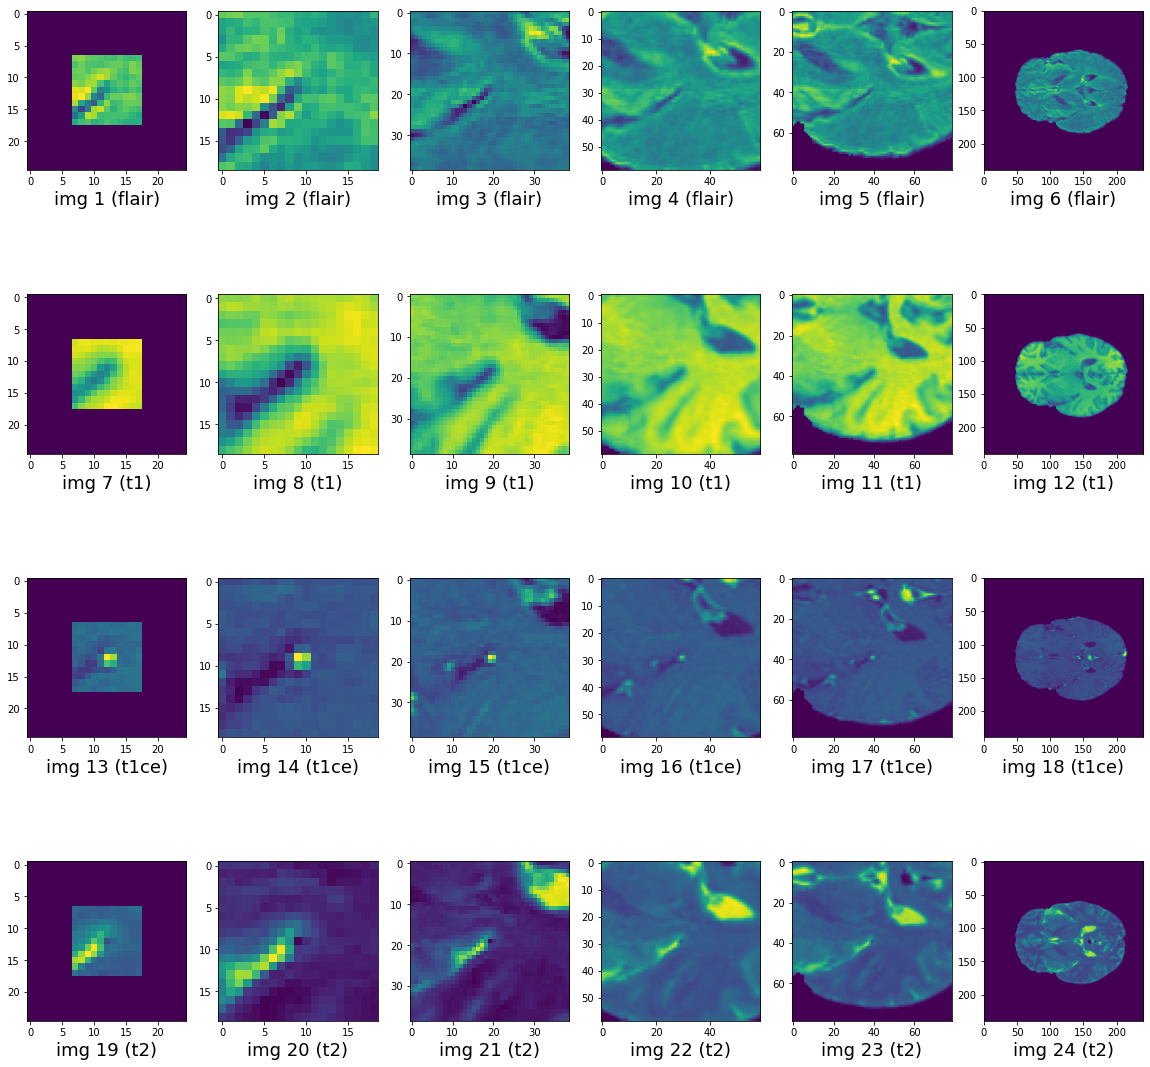

In [208]:
csv_files = []
for root, directories, files in  os.walk(input_csv_path, topdown=False):
    for file in files:
        csv_files.append(file)
fontsize = 18
fig = plt.figure(figsize=(20, 20))
cols = int(len(img_list)/4)
rows = int(len(img_list)/6)
#print(cols,rows)
for i in range(1, cols*rows +1):
    ax = fig.add_subplot(rows, cols, i)
    #print(ax)
    plt.gca().invert_yaxis()
    if i <= 6:
        plt.xlabel("img "+ str(i) + " (flair)",fontsize = fontsize )
    elif 6 < i <= 12:
        plt.xlabel("img "+ str(i) + " (t1)",fontsize = fontsize )
    elif 12 < i <= 18:
        plt.xlabel("img "+ str(i) + " (t1ce)",fontsize = fontsize )
    elif 18 < i <= 24:
        plt.xlabel("img "+ str(i) + " (t2)",fontsize = fontsize )
    #plt.xlabel(img_list[i-1]., fontsize=18)
    #plt.ylabel('ylabel', fontsize=16)
    plt.imshow(img_list[i-1])
plt.show() 


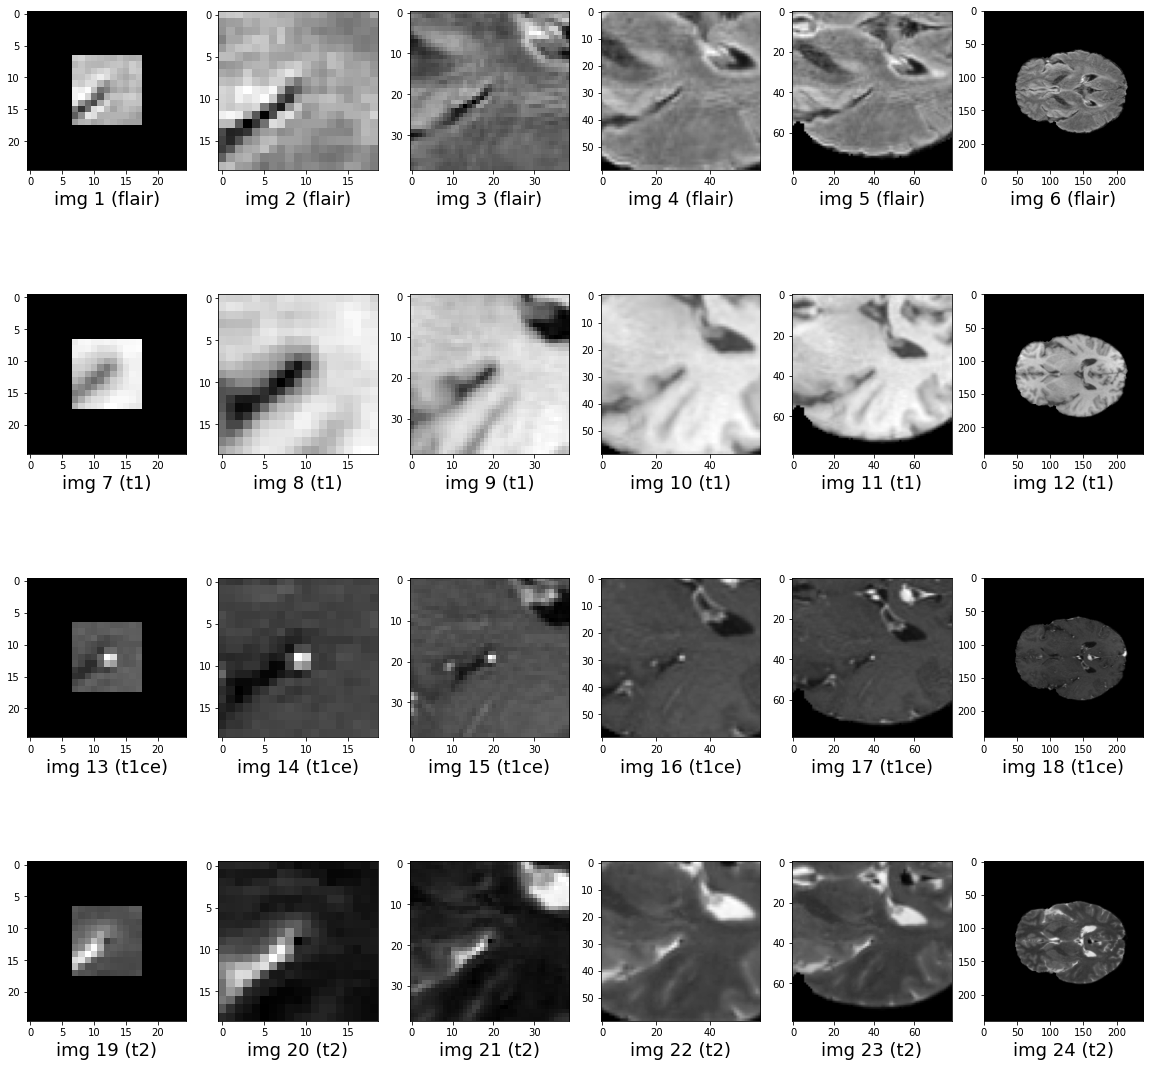

In [210]:
fontsize = 18
fig = plt.figure(figsize=(20, 20))
cols = int(len(img_list)/4)
rows = int(len(img_list)/6)
#print(cols,rows)
for i in range(1, cols*rows +1):
    ax = fig.add_subplot(rows, cols, i)
    #print(ax)
    plt.gca().invert_yaxis()
    if i <= 6:
        plt.xlabel("img "+ str(i) + " (flair)",fontsize = fontsize )
    elif 6 < i <= 12:
        plt.xlabel("img "+ str(i) + " (t1)",fontsize = fontsize )
    elif 12 < i <= 18:
        plt.xlabel("img "+ str(i) + " (t1ce)",fontsize = fontsize )
    elif 18 < i <= 24:
        plt.xlabel("img "+ str(i) + " (t2)",fontsize = fontsize )
    #plt.xlabel(img_list[i-1]., fontsize=18)
    #plt.ylabel('ylabel', fontsize=16)
    plt.imshow(img_list[i-1],cmap = 'gray')
plt.show() 